# Pressure

In [27]:
import gc
import numpy as np
import matplotlib.pyplot as plt
import torch
from itertools import product
from warnings import filterwarnings

from src.utils.commons import get_config, get_device, set_seed
from src.model.gae import GAE
from torch_geometric.loader import DataLoader
from src.training.train_surface import train
from src.data.loader_paper import GraphDatasetPaper
from src.utils.commons import get_config

filterwarnings('ignore')
torch.cuda.empty_cache()
gc.collect()

config = get_config('configs/P_NACA0012.yaml')
set_seed(config['config']['seed'])

train_dataset = GraphDatasetPaper(config = config['config'], split = 'train')
val_dataset = GraphDatasetPaper(config = config['config'], split = 'val')
device = get_device()

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=1, 
                          shuffle=False,
                          num_workers=config['training']['num_workers'])

val_loader = DataLoader(dataset=val_dataset, 
                        batch_size=1, 
                        shuffle=False,
                        num_workers=config['training']['num_workers'])
    
mu1 = np.array([10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4, 45e4, 50e4, 55e4, 60e4, 65e4, 70e4, 75e4, 80e4, 85e4, 90e4, 95e4, 100e4])
mu2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
mu_space = [mu1, mu2]
params = torch.tensor(np.array(list(product(*mu_space))))
params = params.to(device)
surface_mask = train_dataset.surface_mask

num_graphs = train_dataset.num_graphs
model = GAE(config, num_graphs).to(device)

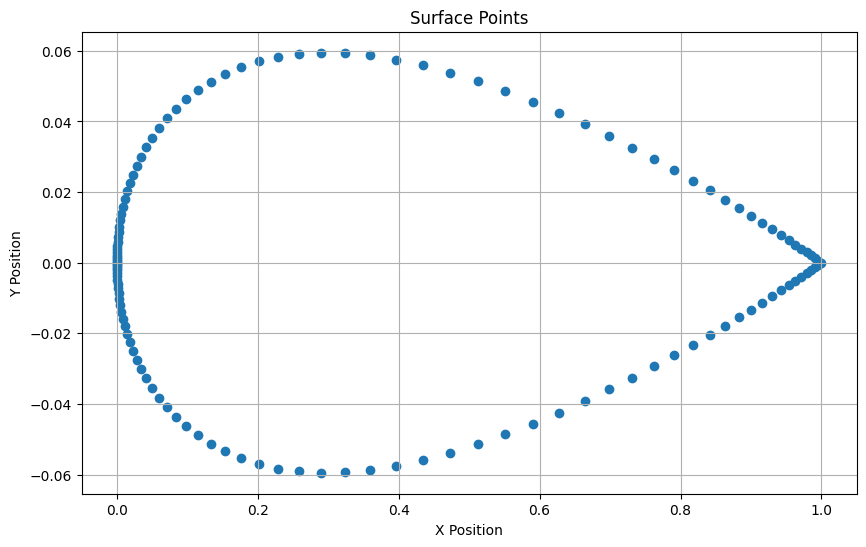

In [2]:
import matplotlib.pyplot as plt
surface_point = train_dataset[0].pos[surface_mask, :]
plt.figure(figsize=(10, 6))
plt.scatter(surface_point[:, 0].cpu().numpy(), surface_point[:, 1].cpu().numpy())
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Surface Points')
plt.grid(True)
plt.show()

## Training

In [3]:
train_dataset[0].x.std()
train_dataset[0].x.mean()

tensor(0.0029)

In [4]:
history = train(model = model, 
                device = device, 
                params = params, 
                surface_mask = surface_mask,
                lambda_surface=1,
                train_loader = train_loader, 
                is_val = True,
                val_loader = val_loader, 
                start_up_epoch=20,
                save_best_model=True,
                save_history=True,
                config = config['training'])

train_history, val_history = history


100%|██████████| 2000/2000 [53:54<00:00,  1.62s/it, train_loss=0.025830, map_loss=0.001093, reconstruction_loss=0.024737, val_loss=0.032441, val_reconstruction_loss=0.031245, val_map_loss=0.001196]


In [5]:
from src.utils.commons import save_config
save_config(config, task='surface')

### Plot train total loss and val total loss

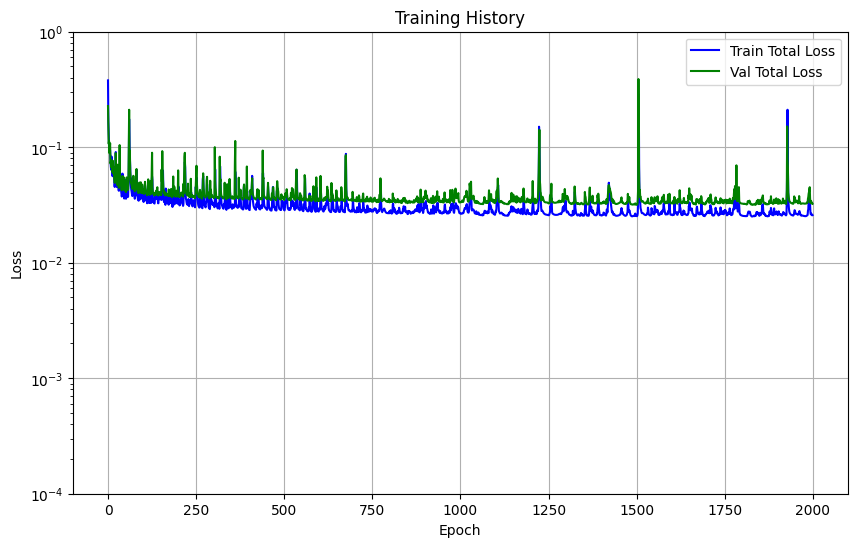

In [2]:
import pickle
import matplotlib.pyplot as plt
from src.utils.commons import get_config

config = get_config('configs/P_NACA0012.yaml')
model_name = config['training']['model_name']
num_epochs = config['training']['epochs']

with open(f"artifacts/surface/{model_name}/{model_name}_history_{num_epochs}.pkl", 'rb') as f:
    # Load the history dictionary
    train_history = pickle.load(f)
    val_history = pickle.load(f)
    
train_total_loss = train_history['train_loss']
val_total_loss = val_history['val_loss']    

plt.figure(figsize=(10, 6))
plt.plot(train_total_loss, label='Train Total Loss', color='blue')
plt.plot(val_total_loss, label='Val Total Loss', color='green')
plt.ylim(0.0001, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.yscale('log') 
plt.show()

### Plot train loss history

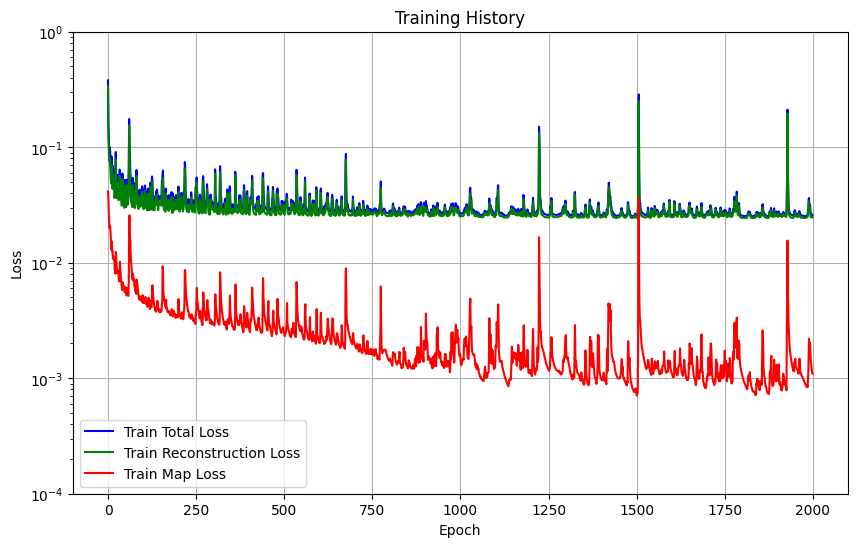

In [3]:
train_total_loss = train_history['train_loss']
train_reconstruction_loss = train_history['reconstruction_loss']
train_map_loss = train_history['map_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_total_loss, label='Train Total Loss', color='blue')
plt.plot(train_reconstruction_loss, label='Train Reconstruction Loss', color='green')
plt.plot(train_map_loss, label='Train Map Loss', color='red')
plt.ylim(0.0001, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.yscale('log') 
plt.show()

### Plot validation loss history

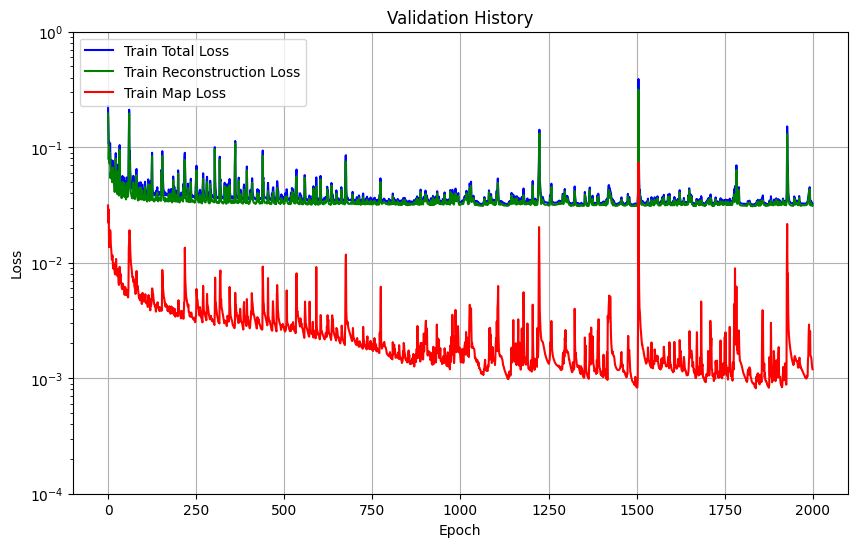

In [4]:
val_total_loss = val_history['val_loss']
val_reconstruction_loss = val_history['reconstruction_loss']
val_map_loss = val_history['map_loss']

plt.figure(figsize=(10, 6))
plt.plot(val_total_loss, label='Train Total Loss', color='blue')
plt.plot(val_reconstruction_loss, label='Train Reconstruction Loss', color='green')
plt.plot(val_map_loss, label='Train Map Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0.0001, 1)
# plt.ylim(0.001, 10)
plt.title('Validation History')
plt.legend()
plt.grid(True)
plt.yscale('log') 
plt.show()

## Plot results

### Matplotlib Plotting

In [12]:
from src.utils.plot import Plot
from src.utils.commons import load_model
import gc
import numpy as np
import torch
from itertools import product
from warnings import filterwarnings

from src.utils.commons import get_config, get_device, set_seed
from src.data.loader_paper import GraphDatasetPaper
from src.utils.commons import get_config

filterwarnings('ignore')
torch.cuda.empty_cache()
gc.collect()

config = get_config('configs/P_NACA0012.yaml')
set_seed(config['config']['seed'])
num_epochs = config['training']['epochs']

train_dataset = GraphDatasetPaper(config = config['config'], split = 'train')
val_dataset = GraphDatasetPaper(config = config['config'], split = 'val')
device = get_device()

mu1 = np.array([10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4, 45e4, 50e4, 55e4, 60e4, 65e4, 70e4, 75e4, 80e4, 85e4, 90e4, 95e4, 100e4])
mu2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
mu_space = [mu1, mu2]
params = torch.tensor(np.array(list(product(*mu_space))))
params = params.to(device)
model_name = config['training']['model_name']
num_epochs = config['training']['epochs']

model = load_model(f"artifacts/surface/{model_name}/{model_name}_best_model_{num_epochs}.pth", config=config, num_graphs=val_dataset.num_graphs)
model = model.to(device)
plot = Plot(train_dataset=train_dataset, val_dataset=val_dataset, model=model)

Original

In [13]:
import pickle

with open(r"dataset/h5_files/scaler.pkl", 'rb') as f:
    scaler = f.read()

Using v_range: 0.5667192339897156


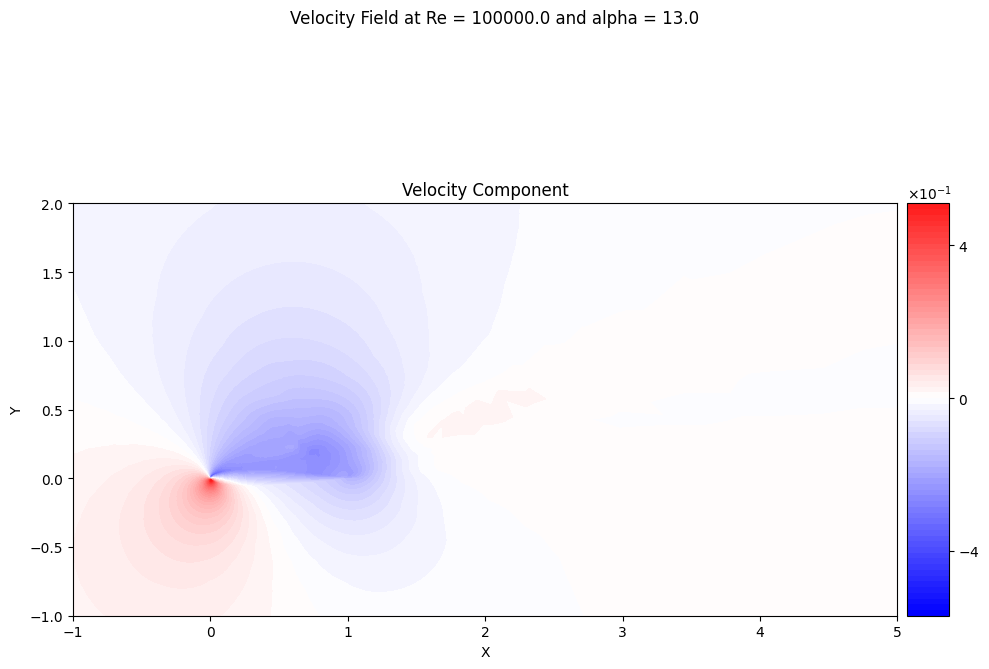

In [14]:
index = 10

test_plot_data = val_dataset[index].to(device)
val_trajectories = val_dataset.file_index[index]
test_param = params[val_trajectories].to(device)

estimated_x, latent_variables, estimated_latent_variables = model(test_plot_data, test_param)
estimated_x = estimated_x.detach().cpu().numpy()
params_detached = params.detach().cpu().numpy()

plot.plot_velocity_field(data=test_plot_data, title=f"Velocity Field at Re = {test_param[0]} and alpha = {test_param[1]}", save=False, xlim=[-1, 5], ylim=[-1, 2], colormap='bwr')

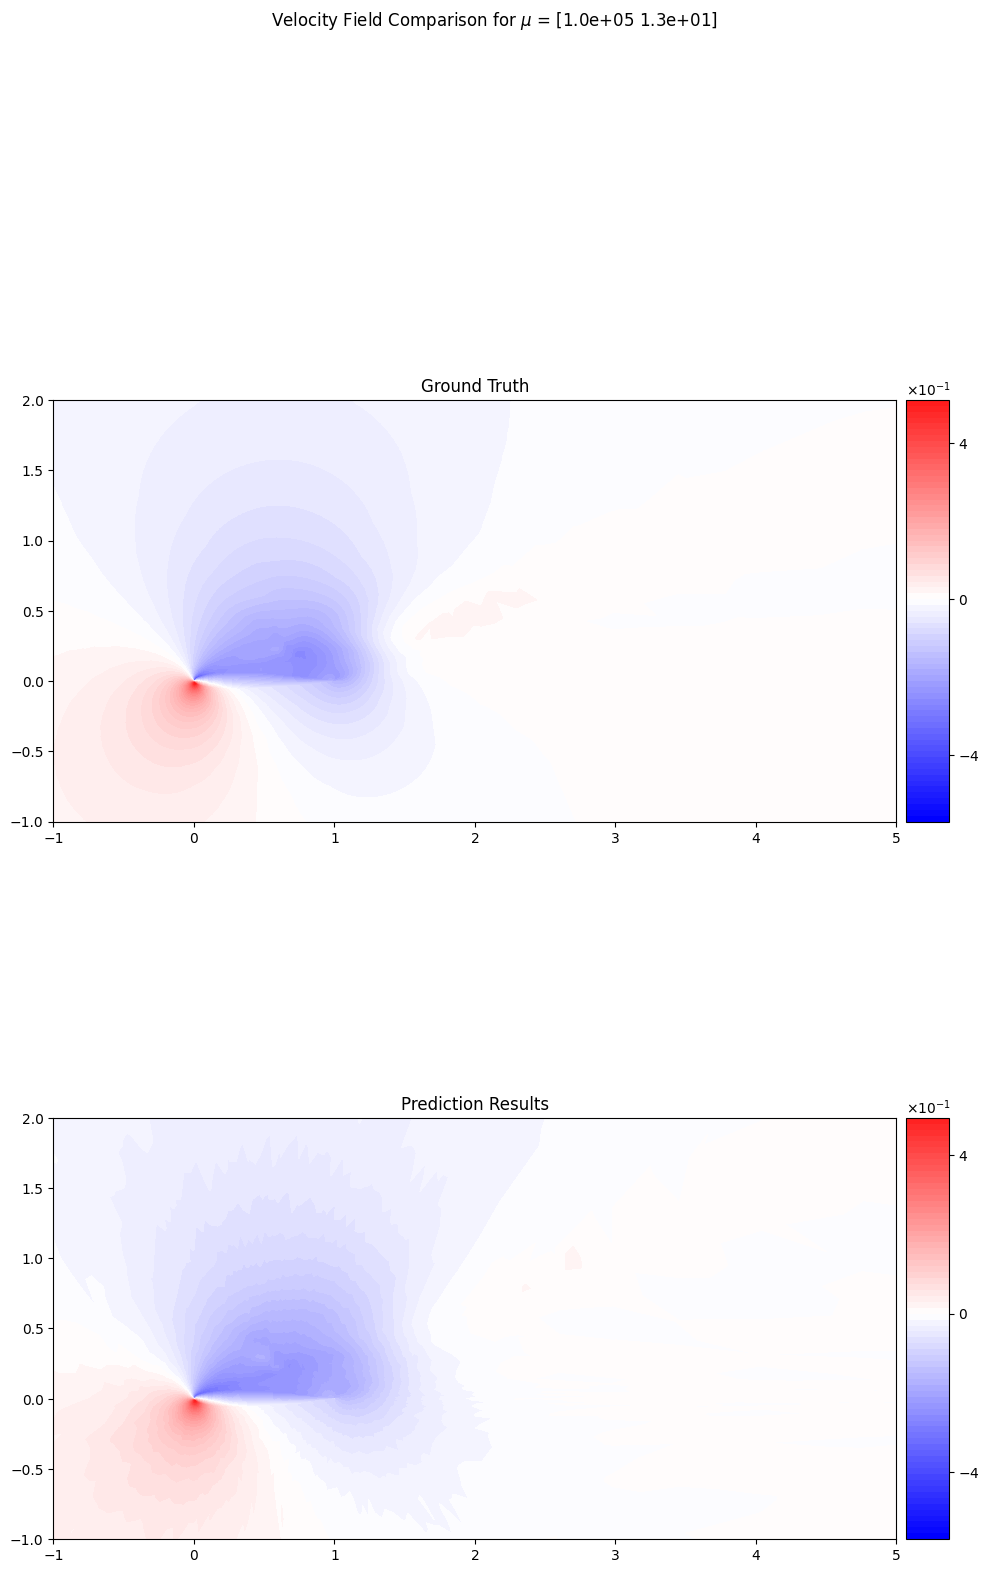

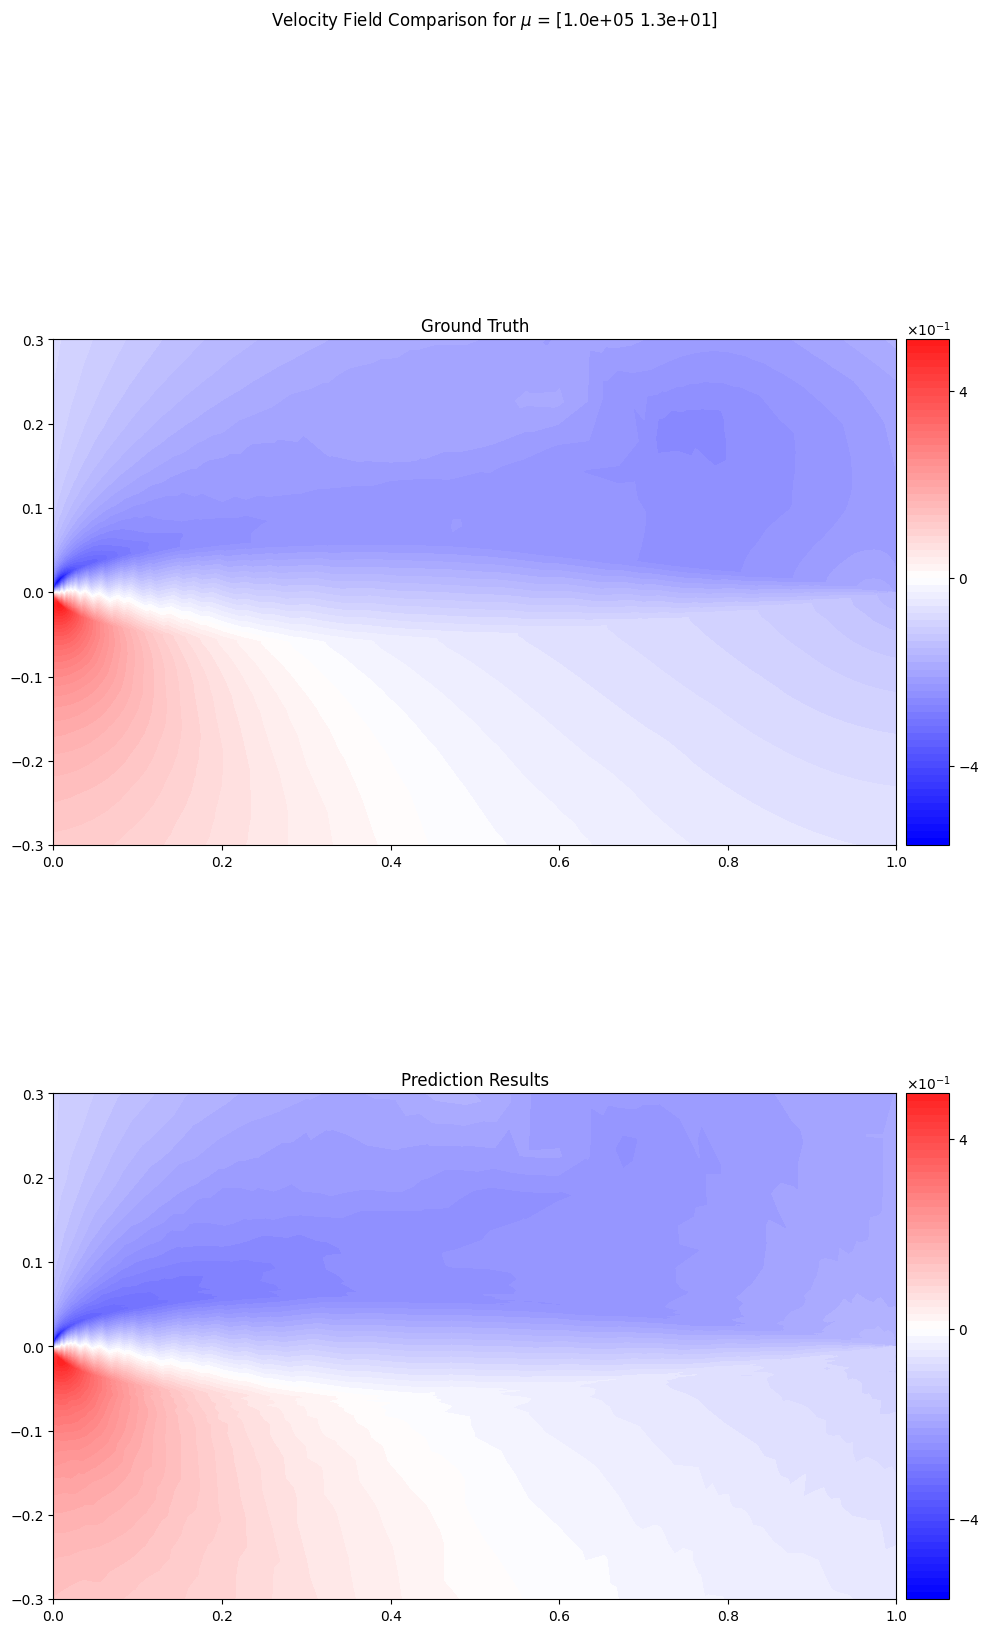

In [15]:
plot.plot_comparison_fields(SNAP = index, device = device, dataset = val_dataset, params = test_param, grid="vertical", colormap='bwr', xlim=[-1, 5], ylim=[-1, 2])

plot.plot_comparison_fields(SNAP = index, 
                            device = device,
                            dataset = val_dataset, 
                            params = test_param, grid="vertical", 
                            colormap='bwr', 
                            # xlim=[-1, 5], ylim=[-1, 2]
                            xlim=[0, 1], ylim=[-0.3, 0.3]
                            )

MSE Error

In [16]:
def relative_error(pred, target, eps=1e-8):
    return torch.abs(pred - target) / (torch.abs(target) + eps)

In [17]:
from torch.nn.functional import mse_loss
# error = relative_error(pred=torch.tensor(estimated_x, device=test_plot_data.x.device), target=test_plot_data.x)
error= mse_loss(input=torch.tensor(estimated_x, device=test_plot_data.x.device), target=test_plot_data.x, reduction='mean')
print(f"Mean Squared Error: {error.item()}")

Mean Squared Error: 0.0003804029256571084


Using v_range: 0.006714201997965574


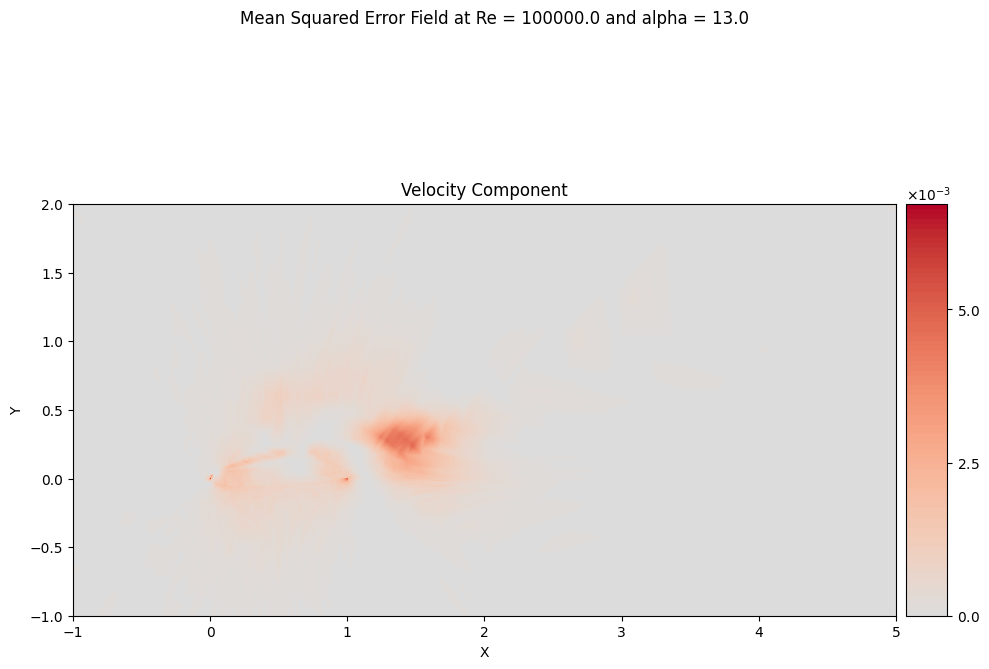

Using v_range: 0.006714201997965574


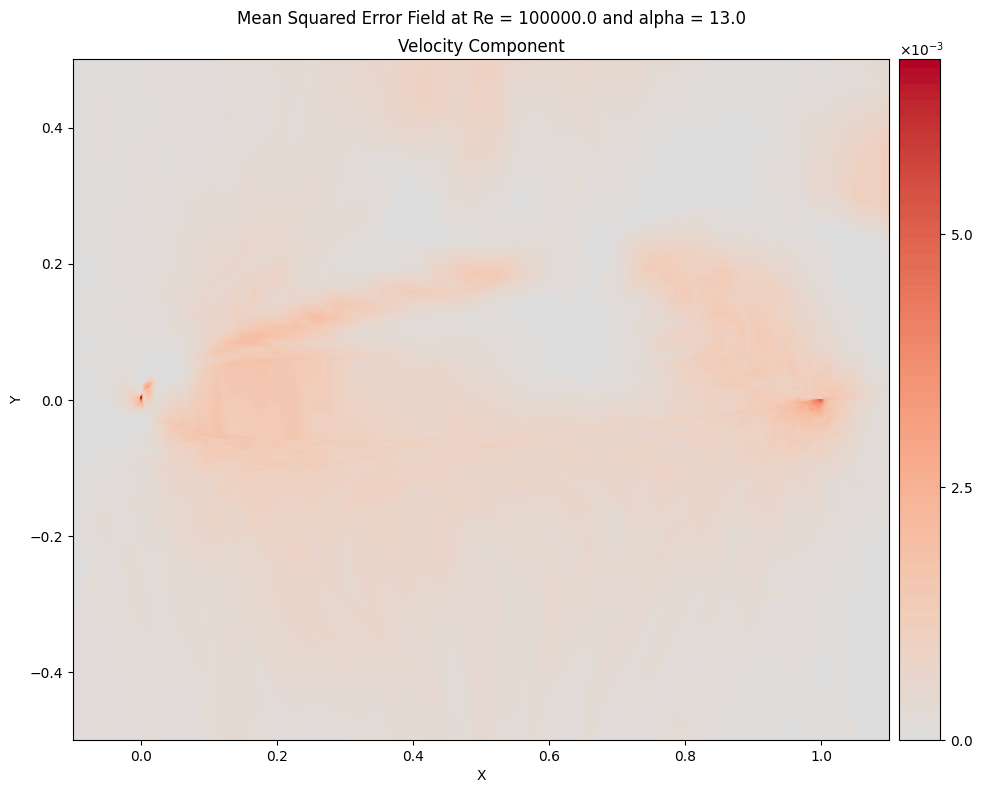

Using v_range: 0.006714201997965574


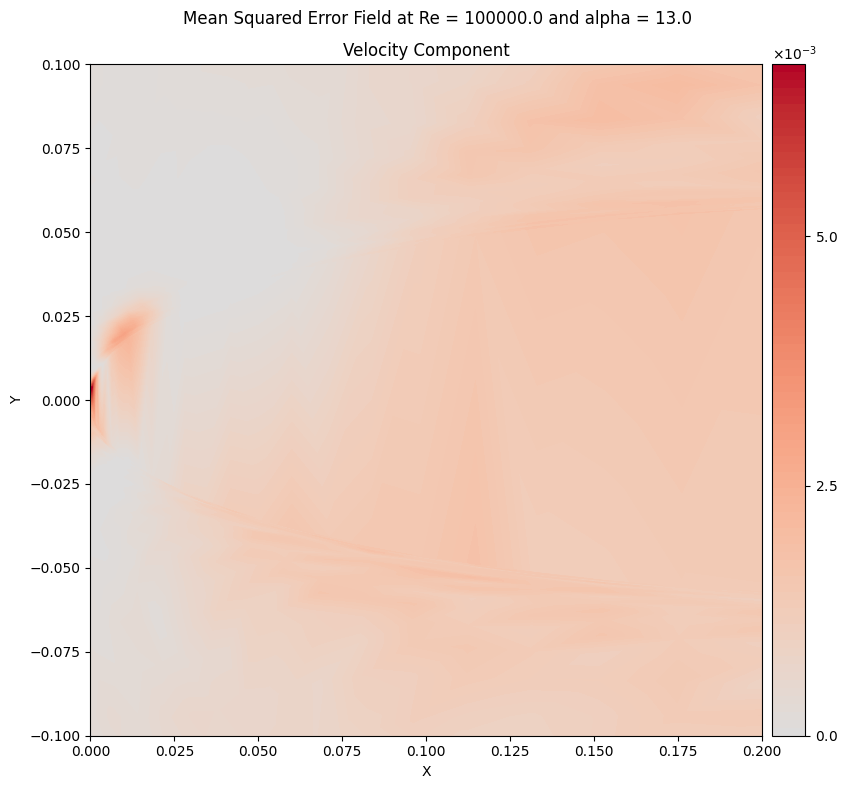

In [22]:
# v_range=[-0.17144335806369781, 0.17144335806369781]
v_range = None
colormap='coolwarm'

plot.plot_velocity_field_error(data=test_plot_data, 
                               params=test_param, device = device, 
                               title=f"Mean Squared Error Field at Re = {test_param[0]} and alpha = {test_param[1]}", 
                               save=False, 
                               v_range=v_range,
                               xlim=[-1, 5], ylim=[-1, 2], 
                               colormap=colormap)

plot.plot_velocity_field_error(data=test_plot_data, 
                               params=test_param, device = device, 
                               title=f"Mean Squared Error Field at Re = {test_param[0]} and alpha = {test_param[1]}", 
                               save=False, 
                               v_range=v_range,
                               xlim=[-0.1, 1.1], ylim=[-0.5, 0.5], 
                               colormap=colormap)

plot.plot_velocity_field_error(data=test_plot_data, 
                               params=test_param, device = device, 
                               title=f"Mean Squared Error Field at Re = {test_param[0]} and alpha = {test_param[1]}", 
                               save=False, 
                               v_range=v_range,
                               xlim=[0, 0.2], ylim=[-0.1, 0.1], 
                               colormap=colormap)

### Pyvista Plotting

In [2]:
from src.utils.plot import PyvistaPlot
from src.utils.commons import load_model
import gc
import numpy as np
import torch
from itertools import product
from warnings import filterwarnings

from src.utils.commons import get_config, get_device, set_seed
from src.data.loader_paper import GraphDatasetPaper
from src.utils.commons import get_config

filterwarnings('ignore')
torch.cuda.empty_cache()
gc.collect()

config = get_config('configs/P_NACA0012.yaml')
set_seed(config['config']['seed'])
num_epochs = config['training']['epochs']

test_dataset = GraphDatasetPaper(config = config['config'], split = 'val')
device = get_device()

mu1 = np.array([10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4, 45e4, 50e4, 55e4, 60e4, 65e4, 70e4, 75e4, 80e4, 85e4, 90e4, 95e4, 100e4])
mu2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
mu_space = [mu1, mu2]
params = torch.tensor(np.array(list(product(*mu_space))))
params = params.to(device)
model_name = config['training']['model_name']
num_epochs = config['training']['epochs']

model = load_model(f"artifacts/surface/{model_name}/{model_name}_best_model_{num_epochs}.pth", config=config, num_graphs=test_dataset.num_graphs)
model = model.to(device)
plot = PyvistaPlot(vtu_dir = "dataset/flows", model=model, dataset=test_dataset)

In [3]:
import pyvista as pv
index = 1
mesh = pv.read(f"dataset/flows/configuration_{index}.vtu")
mesh.clear_data()
mesh.point_data["Pressure"] = test_dataset[test_dataset.file_index.index(index)].x.detach().cpu().numpy()
mesh
# mesh.write_vtu("dataset/flows/configuration_0.vtu")

UnstructuredGrid (0x2648bc35300)
  N Cells:    14336
  N Points:   14576
  X Bounds:   -4.845e+02, 5.010e+02
  Y Bounds:   -5.078e+02, 5.078e+02
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   1

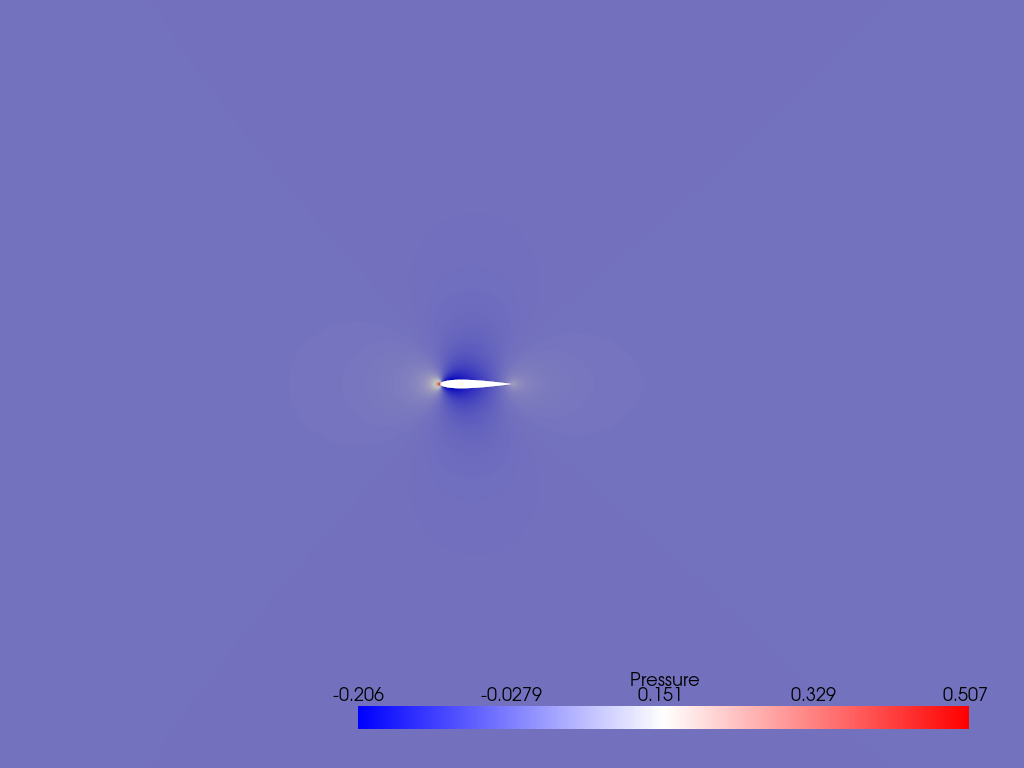

In [ ]:
plotter = pv.Plotter()
plotter.add_mesh(mesh, scalars='Pressure', cmap='bwr')
plotter.view_xy()
# plotter.zoom_camera(1)
plotter.camera_position = [
    (0, 0, 20),   # camera location
    (1, 0, 0),      # focal point (center of the mesh)
    (0, 0, 0)       # view up vector (Z axis is "up")
]
plotter.legend()
# plotter.
# plotter.set_focal_point([0, 0, 0])
plotter.show()

# Post processing

In [1]:
import gc
import numpy as np
import matplotlib.pyplot as plt
import torch
from itertools import product
from warnings import filterwarnings

from src.utils.commons import get_config, get_device, set_seed
from torch_geometric.loader import DataLoader
from src.data.loader_paper import GraphDatasetPaper
from src.utils.commons import get_config, load_model

filterwarnings('ignore')
torch.cuda.empty_cache()
gc.collect()

config = get_config('configs/P_NACA0012.yaml')
set_seed(config['config']['seed'])
device = get_device()
model_name = config['training']['model_name']
num_epochs = config['training']['epochs']

test_dataset = GraphDatasetPaper(config = config['config'], split = 'val')
test_loader = DataLoader(dataset=test_dataset, 
                        batch_size=1, 
                        shuffle=False,
                        num_workers=config['training']['num_workers'])
mu1 = np.array([10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4, 45e4, 50e4, 55e4, 60e4, 65e4, 70e4, 75e4, 80e4, 85e4, 90e4, 95e4, 100e4])
mu2 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
mu_space = [mu1, mu2]
params = torch.tensor(np.array(list(product(*mu_space))))
params = params.to(device)
surface_mask = test_dataset.surface_mask
num_graphs = test_dataset.num_graphs

model = load_model(f"artifacts/surface/{model_name}/{model_name}_best_model_{num_epochs}.pth", config=config, num_graphs=test_dataset.num_graphs)
model = model.to(device)

In [2]:
from src.utils.metrics import mse_error, mae_error, rmse_error, relative_error
from src.training.test import test

error_func = [mse_error, mae_error, rmse_error, relative_error]
test_params = params[test_dataset.file_index]
test_results, total_error = test(model, test_params, test_loader, device, error_func)

In [3]:
total_error

{'total_mse_error': 0.03420029986465787,
 'total_mae_error': 0.06892202448467781,
 'total_rmse_error': 0.16997587942966708,
 'total_relative_error': 4.322089583647472}

# Cp

Good: 5, 6
Hmm: 3, 4, 8
Bad: 1, 2, 9, 10, 11

In [ ]:
index = 5

MSE: 5.966353455733042e-08
Relative Error: 2.4929072424129117e-06


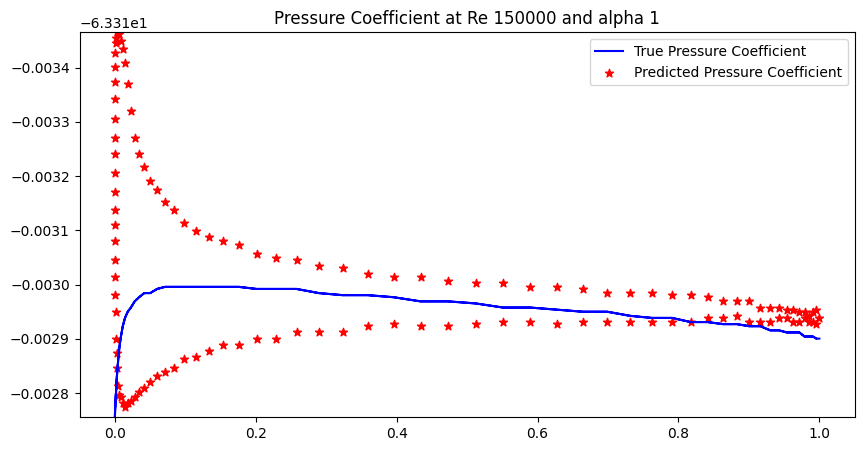

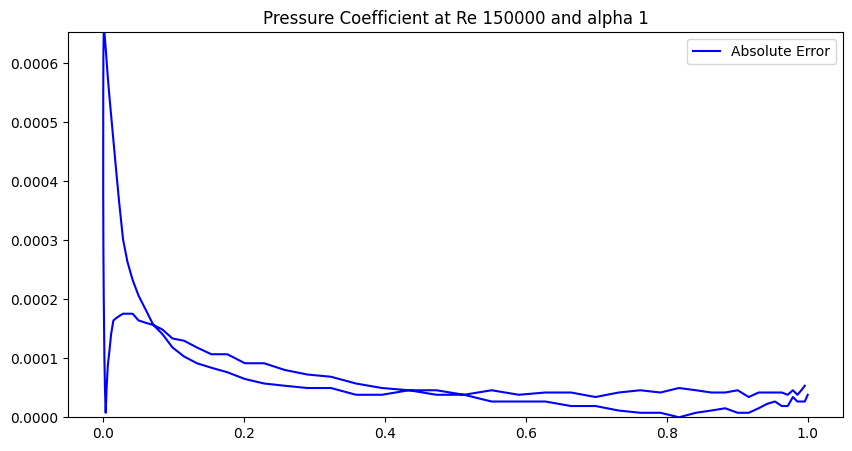

In [ ]:
from src.training.test import single_test

rho_inf = 2.13163
R = 287.058
T_inf = 300
viscosity_inf = 1.853e-05
v_inf = 52.1572 # THIS HAS TO BE CHANGED FOR EACH RE

p_inf = rho_inf * R * T_inf
q_inf = 0.5 * rho_inf * v_inf**2

model = model.to(device)
test_data = test_dataset[index]
test_data = test_data.to(device)
test_param = params[test_dataset.file_index[index]]
file_key = test_dataset.file_keys[0].split('_')[0] + '_' + str(test_dataset.file_index[index])
surface_mask = test_dataset.surface_mask
surface_point = test_data.pos[surface_mask].detach().cpu().numpy()
upper_surface_point = surface_point[surface_point[:, 1] >= 0]
lower_surface_point = surface_point[surface_point[:, 1] < 0]

# VTU FILE
# import pyvista as pv
# import meshio
# vtu_path = f"dataset/full/flow_Re_{int(test_param[0])}_alpha_{int(test_param[1])}.vtu"
# mesh_path = r"dataset/unsteady_naca0012.su2"
# grid = pv.read(vtu_path)
# surface_p = grid["Pressure"][surface_mask,]
# surface_cp = grid["Pressure_Coefficient"][surface_mask,]
# surface_p.shape

# truth
surface_p_graph = test_data.x[surface_mask].detach().cpu().numpy()
surface_cp_graph = test_dataset.h5_file[file_key]['Cp'][:][surface_mask]
surface_cp_graph = (surface_p_graph - p_inf) / q_inf
surface_p_graph.shape

#predicted
pred_p = single_test(model, test_param, test_data, device).detach().cpu().numpy()
surface_pred_p = pred_p[surface_mask,]
surface_pred_cp = (surface_pred_p - p_inf) / q_inf
surface_pred_p.shape

cp_mse = np.mean((surface_cp_graph - surface_pred_cp) ** 2)
print(f"MSE: {cp_mse}")
cp_relative = np.mean(np.abs(surface_pred_cp - surface_cp_graph) / np.abs(surface_cp_graph))
print(f"Relative Error: {cp_relative}")

plt.figure(figsize=(10, 5))
plt.plot(surface_point[:, 0], surface_cp_graph, label="True Pressure Coefficient", color="blue")
plt.scatter(surface_point[:, 0], surface_pred_cp, label="Predicted Pressure Coefficient", color="red", marker="*")
plt.ylim(max([max(surface_cp_graph), max(surface_pred_cp)]), min([min(surface_cp_graph), min(surface_pred_cp)]))
plt.title(f"Pressure Coefficient at Re {int(test_param[0])} and alpha {int(test_param[1])}")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(surface_point[:, 0], np.abs(surface_cp_graph - surface_pred_cp), label="Absolute Error", color="blue")
plt.ylim(0, max([max(np.abs(surface_cp_graph - surface_pred_cp))]))
plt.title(f"Pressure Coefficient at Re {int(test_param[0])} and alpha {int(test_param[1])}")
plt.legend()
plt.show()

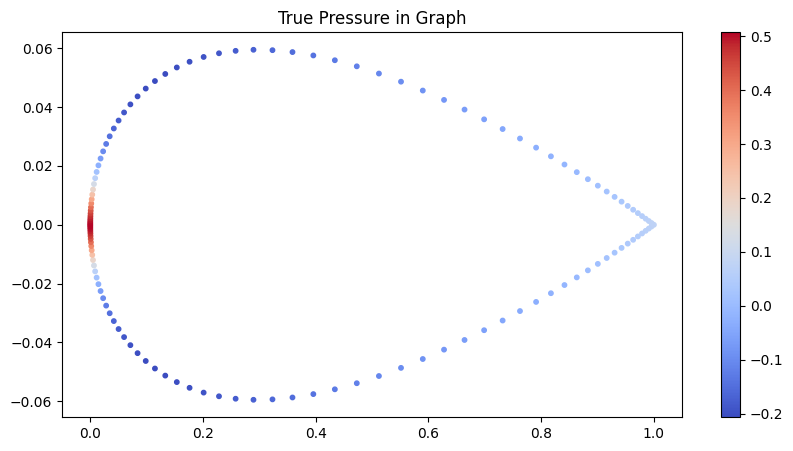

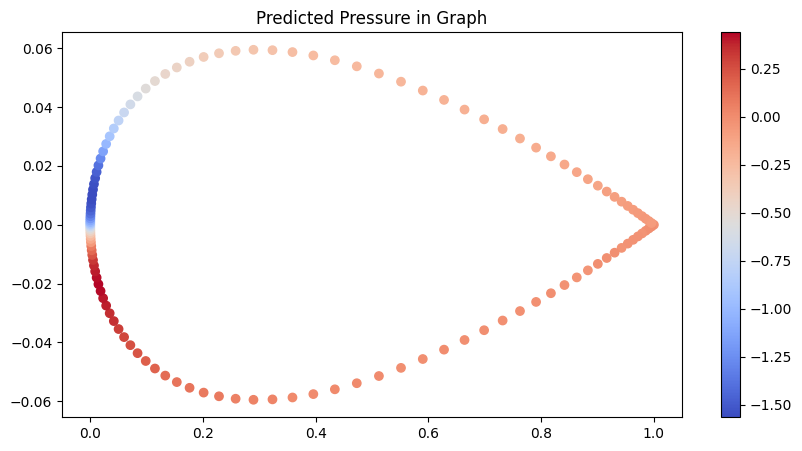

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(surface_point[:, 0], surface_point[:, 1], c=surface_p_graph, cmap="coolwarm", s=10)
plt.colorbar()
plt.title("True Pressure in Graph")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(surface_point[:, 0], surface_point[:, 1], c=surface_pred_p, cmap="coolwarm")
plt.colorbar()
plt.title("Predicted Pressure in Graph")
plt.show()

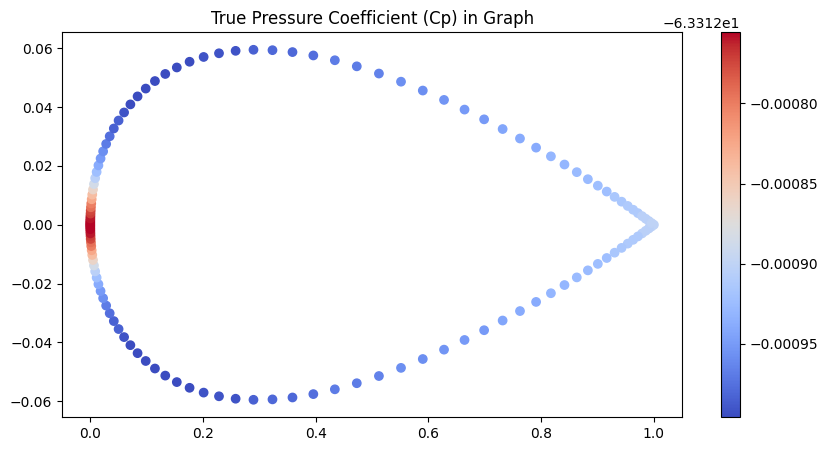

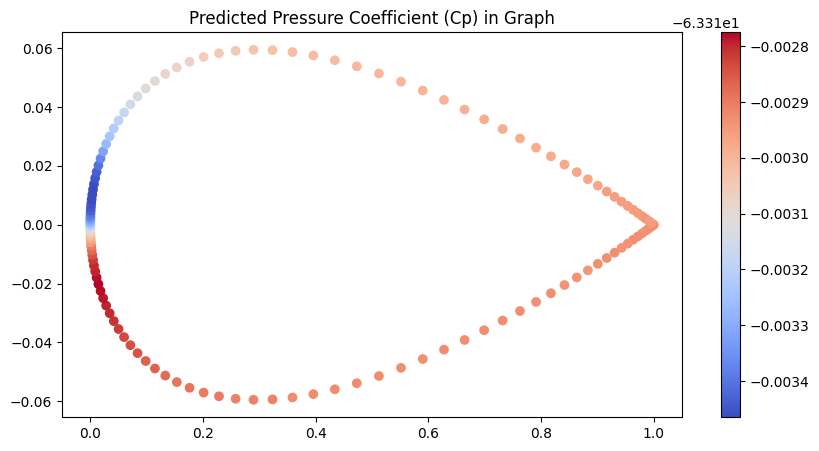

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(surface_point[:, 0], surface_point[:, 1], c=surface_cp_graph, cmap="coolwarm")
plt.colorbar()
plt.title("True Pressure Coefficient (Cp) in Graph")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(surface_point[:, 0], surface_point[:, 1], c=surface_pred_cp, cmap="coolwarm")
plt.colorbar()
plt.title("Predicted Pressure Coefficient (Cp) in Graph")
plt.show()